#Data Loading and Exploratory Data analysis

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization for text
from PIL import Image
from os import path
import os
import random

# Text Processing
import re
import itertools
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
from collections import Counter

# Ignore noise warning
import warnings
warnings.filterwarnings('ignore')

# Work with pickles
import pickle

pd.set_option('display.max_column', None)

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/mbti_1.csv')
print(data.head())


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


**Context**

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E)

Intuition (N) – Sensing (S)

Thinking (T) – Feeling (F)

Judging (J) – Perceiving (P)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
data['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

The dataset has 2 columns:
First column has 4 letter MBTI code and column 2 have thre post/tweets separated by |||.
On top of it, there are links other irrelevant text filler

In [ ]:
print('na values\n', data.isna().sum())
print('\n\nunique\n', data.nunique())

na values
 type     0
posts    0
dtype: int64


unique
 type       16
posts    8675
dtype: int64


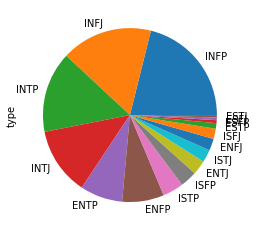

In [ ]:
data.type.value_counts().plot(kind='pie')

In [ ]:

def var_row(row):
    '''function to calculate length of posts'''
    lst = []
    for word in row.split('|||'):
        lst.append(len(word.split()))
    return np.var(lst)



In [ ]:
data['word/comment'] = data['posts'].apply(lambda x: len(x.split())/50)
data['word_count_var'] = data['posts'].apply(lambda x: var_row(x))
data.head()

,type,posts,word/comment,word_count_var
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
word/comment,8675.0,24.524830,6.224211,0.08,20.9300,25.56,29.140000,37.62
word_count_var,8675.0,137.209864,48.285206,0.00,105.4818,140.33,170.478384,313.29


##Tokenizing text to a bag of words

In [ ]:
text = data[['type','posts']].copy()

text = text.fillna('')
text_columns = text[['type']]
text_columns['text'] = text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [ ]:
text_columns['text'] = text_columns['text'].apply(lambda x: x.lower()).apply(lambda x: re.sub('http[s]?://\S+', '', x))

In [ ]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser']) 
nlp.max_length = 33000000

In [ ]:
def tokenize(string):
    doc = nlp(string)
    l_token = [token.text for token in doc if not token.is_punct 
               | token.is_space | token.is_stop | token.is_digit & token.is_oov]
    return ' '.join(l_token)



In [ ]:
text_columns['text'] = text_columns['text'].apply(lambda row: tokenize(row))


,type,text
0,INFJ,intj moments sportscenter plays pranks|||what ...
1,ENTP,finding lack posts alarming.|||sex boring posi...
2,INTP,good course know blessing curse.|||does absolu...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,fired.|||that silly misconception approaching ...


#Data Pre-Processing

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/mbti_1.csv')

'''data cleaning'''
type = ["type"]
posts = ["posts"]
columns = [*type, *posts]

data_raw = data
data_raw[type] = data[type].fillna("")
data_raw[posts] = data[posts].fillna("")
data_raw.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


##Cleaning the posts

In [ ]:

def clean_url(str_text_raw): #removes URL
    str_text = re.sub("url_\S+", "", str_text_raw)
    str_text = re.sub("email_\S+", "", str_text)
    str_text = re.sub("phone_\S+", "", str_text)
    return(re.sub("http[s]?://\S+", "", str_text))
    
def clean_punctuation(str_text_raw): #removes punctuation
    return(re.sub("[$\(\)/|{|\}#~\[\]^#;:!?¿]", " ", str_text_raw))

def clean_unicode(str_text_raw): #removes non-unicode text
    str_text = re.sub("&amp;", "", str_text_raw)
    return(re.sub(r"[^\x00-\x7F]+"," ", str_text))
                      
def clean_dot_words(str_text_raw): #removes dots bw words
    return(re.sub(r"(\w+)\.+(\w+)", r"\1 \2",str_text_raw))

def clean_text(str_text_raw): #converts to lower case
    str_text = str_text_raw.lower()
    str_text = clean_dot_words(clean_punctuation(clean_unicode(clean_url(str_text))))
    return(str_text)


##Tokenization and Lemmatization Function

In [ ]:
tokens_to_drop=["+"]

def string_to_token(string, str_pickle = None):
    doc = nlp(string)
    l_token = [[token.text, token.lemma_, token.orth, token.is_alpha, token.is_digit, token.is_title, token.lang_, 
        token.tag_, token.pos_, token.has_vector, token.vector_norm, token.is_oov]
        for token in doc if not token.is_punct | token.is_space | token.is_stop | token.is_digit | token.like_url 
               | token.like_num | token.like_email & token.is_oov]
    pd_token = pd.DataFrame(l_token, columns=["text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language",
                                          "tag", "part_of_speech", "has_vector", "vector_norm", "is_oov"])

    pd_token = pd_token[~pd_token["text"].isin(tokens_to_drop)]
    pd_token["text_to_singular"] = np.where(pd_token["tag"].isin(["NNPS", "NNS"]), pd_token["lemma"], pd_token["text"])
    if(str_pickle!=None):
        pd_token.to_pickle(f"{str_pickle}.pkl")
    del l_token
    return(pd_token)



In [ ]:

def apply_cleaning(string):
    doc = nlp(clean_text(string))
    l_token = [token.text for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return " ".join(l_token)



In [ ]:
def apply_lemma(string): #returns clear text
    doc = nlp(clean_text(string))
    l_token = [token.lemma_ for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return " ".join(l_token)



In [ ]:
def list_to_bow(l_words): #Creates a bad of words from text
    cv = CountVectorizer(l_words)
    count_vector=cv.fit_transform(l_words)
    word_freq = Counter(l_words)
    print(f"Bag of words size: {count_vector.shape}\nUnique words size: {len(word_freq)}")
    dict_word_freq = dict(word_freq.most_common())
    return(dict_word_freq)

##Cleaning

In [ ]:
data_clean = pd.DataFrame(data_raw[["type", "posts"]])
for c in columns:
    data_clean[c] = data_raw[c].apply(lambda row: clean_text(row))
data_clean["posts"] = data_raw[posts].apply(lambda x: " ".join(x), axis=1)
data_clean.head()

,type,posts
0,infj,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,entp,'I'm finding the lack of me in these posts ver...
2,intp,'Good one _____ https://www.youtube.com/wat...
3,intj,"'Dear INTP, I enjoyed our conversation the o..."
4,entj,'You're fired.|||That's another silly misconce...


In [ ]:
nlp = spacy.load("en_core_web_sm", disable = ["ner", "parser"]) 
nlp.max_length = 33000000

data_clean.shape

(8675, 2)

In [ ]:
'''splitting data in 8 parts and processing entire data was consuming all the ram'''

data_clean_first = data_clean.iloc[:1085]
data_clean_second = data_clean.iloc[1085:2169]
data_clean_third = data_clean[2169:3254]
data_clean_fourth = data_clean[3254: 4338]
data_clean_5th = data_clean.iloc[4338:5423]
data_clean_6th = data_clean[5423:6507]
data_clean_7th = data_clean.iloc[6507:7591]
data_clean_8th = data_clean.iloc[7591:8675]

In [ ]:
%%time
for column in columns:    
    str_bow_column_first = " ".join(data_clean_first[column])
    pd_token_first = string_to_token(str_bow_column_first, f"token_first_{column}")
    print(f"Length of {column} column: {len(str_bow_column_first)}")
    print(f"Number of tokens created: {pd_token_first.shape[0]}\n")

Length of type column: 5424
Number of tokens created: 1085

Length of posts column: 7829496
Number of tokens created: 576063

CPU times: user 1min 11s, sys: 3.89 s, total: 1min 14s
Wall time: 1min 14s


In [ ]:
%%time
for column in columns:    
    str_bow_column_second = " ".join(data_clean_second[column])
    pd_token_second = string_to_token(str_bow_column_second, f"token_second_{column}")
    print(f"Length of {column} column: {len(str_bow_column_second)}")
    print(f"Number of tokens created: {pd_token_second.shape[0]}\n")

Length of type column: 5419
Number of tokens created: 1084

Length of posts column: 7831427
Number of tokens created: 577937

CPU times: user 1min 8s, sys: 1.21 s, total: 1min 9s
Wall time: 1min 9s


In [ ]:
%%time
for column in columns:    
    str_bow_column_third = " ".join(data_clean_third[column])
    pd_token_third = string_to_token(str_bow_column_third, f"token_third_{column}")
    print(f"Length of {column} column: {len(str_bow_column_third)}")
    print(f"Number of tokens created: {pd_token_third.shape[0]}\n")

Length of type column: 5424
Number of tokens created: 1085

Length of posts column: 7805701
Number of tokens created: 573633

CPU times: user 1min 8s, sys: 799 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
%%time
for column in columns:    
    str_bow_column_fourth = " ".join(data_clean_fourth[column])
    pd_token_fourth = string_to_token(str_bow_column_fourth, f"token_fourth_{column}")
    print(f"Length of {column} column: {len(str_bow_column_fourth)}")
    print(f"Number of tokens created: {pd_token_fourth.shape[0]}\n")

Length of type column: 5419
Number of tokens created: 1084

Length of posts column: 7837531
Number of tokens created: 579298

CPU times: user 1min 8s, sys: 778 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
%%time
for column in columns:    
    str_bow_column_5th = " ".join(data_clean_5th[column])
    pd_token_5th = string_to_token(str_bow_column_5th, f"token_5th_{column}")
    print(f"Length of {column} column: {len(str_bow_column_5th)}")
    print(f"Number of tokens created: {pd_token_5th.shape[0]}\n")

Length of type column: 5424
Number of tokens created: 1085

Length of posts column: 7864849
Number of tokens created: 579168

CPU times: user 1min 7s, sys: 780 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
%%time
for column in columns:    
    str_bow_column_6th = " ".join(data_clean_6th[column])
    pd_token_6th = string_to_token(str_bow_column_6th, f"token_6th_{column}")
    print(f"Length of {column} column: {len(str_bow_column_6th)}")
    print(f"Number of tokens created: {pd_token_6th.shape[0]}\n")

Length of type column: 5419
Number of tokens created: 1084

Length of posts column: 7772523
Number of tokens created: 573276

CPU times: user 1min 6s, sys: 797 ms, total: 1min 7s
Wall time: 1min 7s


In [ ]:
%%time
for column in columns:    
    str_bow_column_7th = " ".join(data_clean_7th[column])
    pd_token_7th = string_to_token(str_bow_column_7th, f"token_7th_{column}")
    print(f"Length of {column} column: {len(str_bow_column_7th)}")
    print(f"Number of tokens created: {pd_token_7th.shape[0]}\n")

Length of type column: 5419
Number of tokens created: 1084

Length of posts column: 7982111
Number of tokens created: 587553

CPU times: user 1min 8s, sys: 808 ms, total: 1min 8s
Wall time: 1min 8s


In [ ]:
%%time
for column in columns:    
    str_bow_column_8th = " ".join(data_clean_8th[column])
    pd_token_8th = string_to_token(str_bow_column_8th, f"token_8th_{column}")
    print(f"Length of {column} column: {len(str_bow_column_8th)}")
    print(f"Number of tokens created: {pd_token_8th.shape[0]}\n")

Length of type column: 5419
Number of tokens created: 1084

Length of posts column: 7848564
Number of tokens created: 580171

CPU times: user 1min 7s, sys: 761 ms, total: 1min 7s
Wall time: 1min 7s


###Loading Pickles

In [ ]:
%%time
pd_token_first = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_first_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_first = pd.concat([pd_token_first, pd_temp])
print(f"Total rows loaded: {pd_token_first.shape[0]}")

Loading type info with 1085 rows
Loading posts info with 576063 rows
Total rows loaded: 577148
CPU times: user 671 ms, sys: 20.1 ms, total: 691 ms
Wall time: 690 ms


In [ ]:
%%time
pd_token_second = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_second_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_second = pd.concat([pd_token_second, pd_temp])
print(f"Total rows loaded: {pd_token_second.shape[0]}")

Loading type info with 1084 rows
Loading posts info with 577937 rows
Total rows loaded: 579021
CPU times: user 754 ms, sys: 28.1 ms, total: 782 ms
Wall time: 779 ms


In [ ]:
%%time
pd_token_third = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_third_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_third = pd.concat([pd_token_third, pd_temp])
print(f"Total rows loaded: {pd_token_third.shape[0]}")

Loading type info with 1085 rows
Loading posts info with 573633 rows
Total rows loaded: 574718
CPU times: user 779 ms, sys: 24.2 ms, total: 804 ms
Wall time: 804 ms


In [ ]:
%%time
pd_token_fourth = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_fourth_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_fourth = pd.concat([pd_token_fourth, pd_temp])
print(f"Total rows loaded: {pd_token_fourth.shape[0]}")

Loading type info with 1084 rows
Loading posts info with 579298 rows
Total rows loaded: 580382
CPU times: user 788 ms, sys: 20.1 ms, total: 808 ms
Wall time: 805 ms


In [ ]:
%%time
pd_token_5th = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_5th_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_5th = pd.concat([pd_token_5th, pd_temp])
print(f"Total rows loaded: {pd_token_5th.shape[0]}")

Loading type info with 1085 rows
Loading posts info with 579168 rows
Total rows loaded: 580253
CPU times: user 792 ms, sys: 49.3 ms, total: 841 ms
Wall time: 841 ms


In [ ]:
%%time
pd_token_6th = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_6th_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_6th = pd.concat([pd_token_6th, pd_temp])
print(f"Total rows loaded: {pd_token_6th.shape[0]}")

Loading type info with 1084 rows
Loading posts info with 573276 rows
Total rows loaded: 574360
CPU times: user 780 ms, sys: 23.1 ms, total: 803 ms
Wall time: 794 ms


In [ ]:
%%time
pd_token_7th = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_7th_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_7th = pd.concat([pd_token_7th, pd_temp])
print(f"Total rows loaded: {pd_token_7th.shape[0]}")

Loading type info with 1084 rows
Loading posts info with 587553 rows
Total rows loaded: 588637
CPU times: user 785 ms, sys: 66.2 ms, total: 851 ms
Wall time: 848 ms


In [ ]:
%%time
pd_token_8th = pd.DataFrame(columns=["column", "text", "lemma", "orth", "is_alpha", "is_digit", "is_title", "language", "tag", 
                                 "part_of_speech", "has_vector", "vector_norm", "is_oov", "text_to_singular"])
for column in columns:
    pd_temp = pd.read_pickle(f"token_8th_{column}.pkl") #Modified
    pd_temp["column"] = column
    print(f"Loading {column} info with {pd_temp.shape[0]} rows")
    pd_token_8th = pd.concat([pd_token_8th, pd_temp])
print(f"Total rows loaded: {pd_token_8th.shape[0]}")

Loading type info with 1084 rows
Loading posts info with 580171 rows
Total rows loaded: 581255
CPU times: user 760 ms, sys: 168 ms, total: 928 ms
Wall time: 922 ms


##Assembling cleaned Data

In [ ]:
# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer #not used
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.cluster as cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

In [ ]:
corpus = text_columns['text']
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [ ]:
svd = TruncatedSVD(n_components=100, n_iter=10, random_state=42)
svd_vec = svd.fit_transform(tfidf)
svd_vec_positive = svd_vec-np.amin(svd_vec)
text_columns_svd_vec = pd.DataFrame(svd_vec_positive)

In [ ]:

def var_row(row):
    '''function to calculate length of posts'''
    lst = []
    for word in row.split('|||'):
        lst.append(len(word.split()))
    return np.var(lst)

In [ ]:
data['word/comment'] = data['posts'].apply(lambda x: len(x.split())/50)
data['word_count_var'] = data['posts'].apply(lambda x: var_row(x))

In [ ]:
type_dummies = pd.get_dummies(text_columns["type"])
text_columns.drop(["text"], axis=1, inplace=True)
text_columns = pd.concat([text_columns, data["word/comment"], data["word_count_var"], 
                          type_dummies], axis=1,levels=None ,sort=False)

In [ ]:
map1 = {"i": 0, "e": 1}
map2 = {"n": 0, "s": 1}
map3 = {"t": 0, "f": 1}
map4 = {"j": 0, "p": 1}
text_columns["i-e"] = text_columns["type"].astype(str).str[0]
text_columns["i-e"] = text_columns["i-e"].map(map1)
text_columns["n-s"] = text_columns["type"].astype(str).str[1]
text_columns["n-s"] = text_columns["n-s"].map(map2)
text_columns["t-f"] = text_columns["type"].astype(str).str[2]
text_columns["t-f"] = text_columns["t-f"].map(map3)
text_columns["j-p"] = text_columns["type"].astype(str).str[3]
text_columns["j-p"] = text_columns["j-p"].map(map4)

In [ ]:
text_columns.head()

,type,word/comment,word_count_var,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,i-e,n-s,t-f,j-p
0,INFJ,11.12,135.2900,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,ENTP,23.40,187.4756,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,INTP,16.72,180.6900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN
3,INTJ,21.28,181.8324,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
4,ENTJ,19.34,196.4576,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
result_svd_vec_types = pd.concat([text_columns, text_columns_svd_vec], axis=1,levels=None ,sort=False)
result_svd_vec_types.shape

(8675, 123)

#Training and Evaluation

In [ ]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
dataset= result_svd_vec_types
dataset.head()

,type,word/comment,word_count_var,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,i-e,n-s,t-f,j-p,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,INFJ,11.12,135.2900,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.424292,0.221979,0.223257,0.260481,0.239895,0.332724,0.256952,0.246808,0.245550,0.188710,0.212569,0.245508,0.224747,0.238921,0.273763,0.228115,0.216283,0.244949,0.250878,0.250242,0.210765,0.220811,0.244172,0.245078,0.255528,0.239739,0.228438,0.235710,0.231222,0.231880,0.258491,0.220799,0.224824,0.245010,0.261726,0.226309,0.229078,0.215563,0.291351,0.264419,0.240619,0.254415,0.251443,0.223923,0.233259,0.248976,0.277044,0.264952,0.238961,0.276379,0.255752,0.232525,0.196019,0.240461,0.288313,0.245903,0.253702,0.273407,0.205230,0.243631,0.219951,0.199161,0.279685,0.207767,0.222770,0.260408,0.237617,0.252720,0.248964,0.247744,0.254197,0.244797,0.230358,0.259904,0.258497,0.236665,0.245082,0.260761,0.256970,0.236918,0.279110,0.276330,0.266655,0.244505,0.238118,0.218927,0.213779,0.242838,0.246249,0.260346,0.219788,0.249448,0.240567,0.240980,0.260001,0.241410,0.220262,0.256099,0.270447,0.239060
1,ENTP,23.40,187.4756,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.512336,0.270606,0.231361,0.237779,0.262147,0.256308,0.281583,0.234857,0.203015,0.280732,0.183606,0.255812,0.183467,0.173310,0.257944,0.199855,0.287419,0.213050,0.320910,0.187991,0.225111,0.247617,0.272507,0.223507,0.265317,0.267983,0.201192,0.216407,0.254858,0.256070,0.229197,0.265182,0.227347,0.204626,0.276174,0.219029,0.232881,0.269568,0.240897,0.229478,0.222472,0.253692,0.241168,0.249461,0.245981,0.254495,0.263577,0.256392,0.256513,0.246880,0.202722,0.193759,0.267006,0.231230,0.263458,0.246140,0.247140,0.251111,0.209930,0.223167,0.227846,0.251291,0.224321,0.255635,0.261138,0.271112,0.219496,0.219806,0.256414,0.298727,0.245107,0.185666,0.250616,0.217712,0.270527,0.256796,0.260284,0.254345,0.217415,0.257889,0.231313,0.258900,0.202629,0.215404,0.270147,0.256234,0.238020,0.251120,0.233910,0.252811,0.282138,0.239960,0.254161,0.253700,0.238223,0.225366,0.239606,0.276659,0.185072,0.259349
2,INTP,16.72,180.6900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,0.453419,0.212463,0.196177,0.250877,0.247118,0.272462,0.234877,0.255458,0.226003,0.219528,0.225960,0.218458,0.235643,0.252009,0.234539,0.229132,0.255772,0.257050,0.210104,0.232222,0.226197,0.250152,0.226022,0.256622,0.226176,0.212571,0.237075,0.232378,0.268323,0.233809,0.223600,0.265900,0.229558,0.224273,0.204343,0.231832,0.258835,0.256800,0.233614,0.246632,0.257358,0.250249,0.230798,0.255211,0.253944,0.240884,0.221844,0.247656,0.264205,0.268362,0.228603,0.288857,0.215771,0.227535,0.245938,0.207461,0.282305,0.264129,0.242983,0.258839,0.230258,0.255348,0.250516,0.233691,0.261546,0.264405,0.219584,0.239799,0.221116,0.256627,0.240795,0.219069,0.296442,0.266643,0.252166,0.251548,0.243446,0.242077,0.260126,0.217578,0.251147,0.205247,0.298296,0.257042,0.247512,0.244051,0.241837,0.263082,0.254114,0.247784,0.259778,0.260381,0.280320,0.231217,0.248176,0.246254,0.251789,0.229420,0.241632,0.260607
3,INTJ,21.28,181.8324,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,0.523244,0.335832,0.177619,0.247518,0.257205,0.240000,0.242981,0.284529,0.312536,0.261690,0.246172,0.230270,0.233412,0.267768,0.215694,0.260665,0.210179,0.241720,0.241277,0.254808,0.236381,0.249450,0.238034,0.263499,0.219838,0.261012,0.225656,0.222441,0.185263,0.259903,0.207290,0.172593,0.205041,0.241026,0.263742,0.270392,0.279314,0.244686,0.306018,0.259315,0.275684,0.182111,0.301434,0.222132,0.247557,0.237855,0.281490,0.250528,0.238241,0.254937,0.282437,0.231587,0.272571,0.241951,0.216058,0.260820,0.237585,0.270700,0.259161,0.265652,0.278408,0.233587,0.234908,0.239107,0.234709,0.212718,0.2158

##Resampled Data

In [ ]:
def sampling_k_elements(group, k=39):
    if len(group) < k:
        return group
    return group.sample(k)

In [ ]:
balanced_svd = dataset.groupby("type").apply(sampling_k_elements).reset_index(drop=True)

In [ ]:
X = balanced_svd.drop(["type","ENFJ", "ENFP", "ENTJ", "ENTP", "ESFJ", "ESFP", "ESTJ", "ESTP","INFJ", "INFP", "INTJ",
                               "INTP", "ISFJ", "ISFP", "ISTJ", "ISTP"], axis=1).values
y = balanced_svd["type"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(499, 102) (499,) (125, 102) (125,)


In [ ]:
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy', n_jobs=-1))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision_weighted', n_jobs=-1))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall_weighted', n_jobs=-1))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1_weighted', n_jobs=-1))
    y_pred = model.predict(X_test)
    mcm = multilabel_confusion_matrix(y_test, y_pred)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    specificities = tn / (tn+fp)
    specificity = (specificities.sum())/ 16

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'specificity': [specificity]
                            })   
    return df_model

In [ ]:
models = {'gnb': GaussianNB(),
          'logit': LogisticRegression(),
          'knn': KNeighborsClassifier(),
          'decisiontree': DecisionTreeClassifier(),
          'randomforest': RandomForestClassifier(),
          'xgboost': GradientBoostingClassifier(),
          'MLPC': MLPClassifier()
         }

In [ ]:
# Evaluation of models
models_svd_resampled = pd.concat([baseline_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models.items()])
models_svd_resampled.sort_values(by='f1score', axis=0, ascending=False, inplace=True)
models_svd_resampled.to_csv("models_svd_resampled.csv")
models_svd_resampled

,model,accuracy,precision,recall,f1score,specificity
0,randomforest,0.500990,0.488610,0.474747,0.479765,0.964438
0,gnb,0.414929,0.473918,0.396768,0.402838,0.962437
0,xgboost,0.388788,0.413575,0.386727,0.386348,0.961075
0,decisiontree,0.258424,0.310567,0.262263,0.282510,0.953618
0,logit,0.178424,0.260113,0.192323,0.175480,0.949783
0,MLPC,0.106182,0.134249,0.120283,0.076159,0.939604
0,knn,0.074101,0.071428,0.068081,0.055547,0.936702


##With complete Data

In [ ]:
dataset= dataset.drop(['i-e', 'n-s', 't-f', 'j-p'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

X = dataset.drop(["type","ENFJ", "ENFP", "ENTJ", "ENTP", "ESFJ", "ESFP", "ESTJ", "ESTP","INFJ", "INFP", "INTJ",
                               "INTP", "ISFJ", "ISFP", "ISTJ", "ISTP"], axis=1).values
y = dataset["type"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(6940, 102) (6940,) (1735, 102) (1735,)


In [ ]:
X.max()

313.28999999999996

In [ ]:
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy', n_jobs=-1))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision_weighted', n_jobs=-1))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall_weighted', n_jobs=-1))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1_weighted', n_jobs=-1))
    y_pred = model.predict(X_test)
    mcm = multilabel_confusion_matrix(y_test, y_pred)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    specificities = tn / (tn+fp)
    specificity = (specificities.sum())/ 16

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'specificity'  : [specificity]
                            })   
    return df_model

In [ ]:
models = {'gnb': GaussianNB(),
          'logit': LogisticRegression(),
          'knn': KNeighborsClassifier(),
          'decisiontree': DecisionTreeClassifier(),
          'randomforest': RandomForestClassifier(),
          'xgboost': GradientBoostingClassifier(),
          'MLPC': MLPClassifier()
         }

In [ ]:
# Evaluation of models
models_svd = pd.concat([baseline_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models.items()])
models_svd.sort_values(by='f1score', axis=0, ascending=False, inplace=True)
models_svd.to_csv("models_svd.csv")
models_svd

,model,accuracy,precision,recall,f1score,specificity
0,xgboost,0.628098,0.620953,0.624207,0.621289,0.973740
0,randomforest,0.609942,0.630501,0.609510,0.585654,0.971489
0,MLPC,0.584438,0.580202,0.584438,0.548214,0.973100
0,gnb,0.542219,0.585795,0.539049,0.546928,0.966976
0,decisiontree,0.414409,0.413073,0.414409,0.418012,0.958814
0,knn,0.146974,0.139504,0.140634,0.142580,0.938366
0,logit,0.210519,0.097376,0.209942,0.101549,0.937141
